## Install packages

In [3]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



## Generate graph

In [55]:
set.seed(12345)
pl = c(0.003,0.004,0.01,0.05,0.1)
gl_map = c()
for( p in pl){
    g = erdos.renyi.game(1000, p, directed=F)
    degreesVector <- degree(g)
    #hist(degreesVector)
    print(mean(degreesVector))
    print(is.connected(g))
    #print(var(degreesVector))
    #plot(g,vertex.size=1, vertex.label.cex=0.1)    
    g.components <- clusters(g)
    #print(g.components$csize)
    # which is the largest component
    ix <- which.max(g.components$csize)
    # get the subgraph correspondent to just the giant component
    g.giant <- induced.subgraph(g, which(g.components$membership == ix))
    print(vcount(g.giant))
}

[1] 3.144
[1] FALSE
[1] 937
[1] 4.116
[1] FALSE
[1] 983
[1] 9.854
[1] TRUE
[1] 1000
[1] 50.34
[1] TRUE
[1] 1000
[1] 99.236
[1] TRUE
[1] 1000


In [57]:
pl2 = c(0.001, 0.002, 0.0025, 0.003,0.004,0.006,0.008,0.01,0.05,0.1)

In [63]:
print(rep('1',10))

 [1] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"


In [64]:
x = c()
for(p in pl2){
    x = c(x, rep(p,100))
}

In [67]:
cl = c()
for( p in pl2){
    for(i in 1:100){
        g = erdos.renyi.game(1000, p, directed=F)
        degreesVector <- degree(g)
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
       # print(vcount(g.giant)/1000)
        cl = c(cl,vcount(g.giant)/1000)
    }
    
}


In [93]:
library('RColorBrewer')
colbox<-brewer.pal(n=10,name="Set3")


In [94]:
cols_ = c()
for(x_ in x){
    cols_ = c(cols_,colbox[match(x,pl2)])
}


In [95]:
print(cols)

 [1] "#8DD3C7" "#FFFFB3" "#BEBADA" "#FB8072" "#80B1D3" "#FDB462" "#B3DE69"
 [8] "#FCCDE5" "#D9D9D9" "#BC80BD"


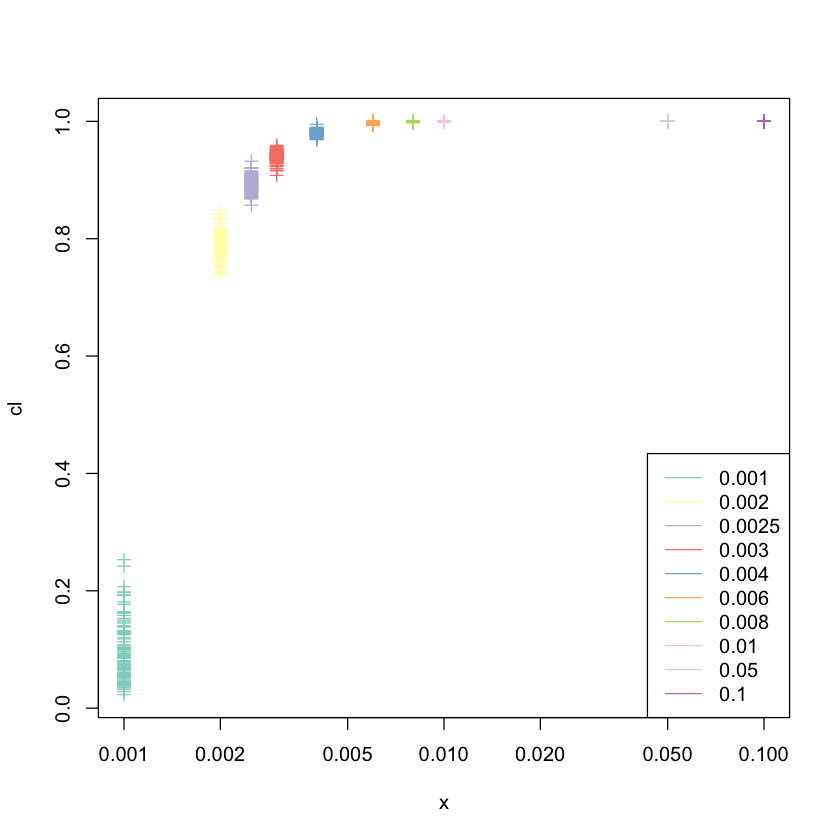

In [110]:
plot(x, cl, pch = 3,log='x', col = cols_)
legend("bottomright", legend=pl2,col=cols, lwd=1)


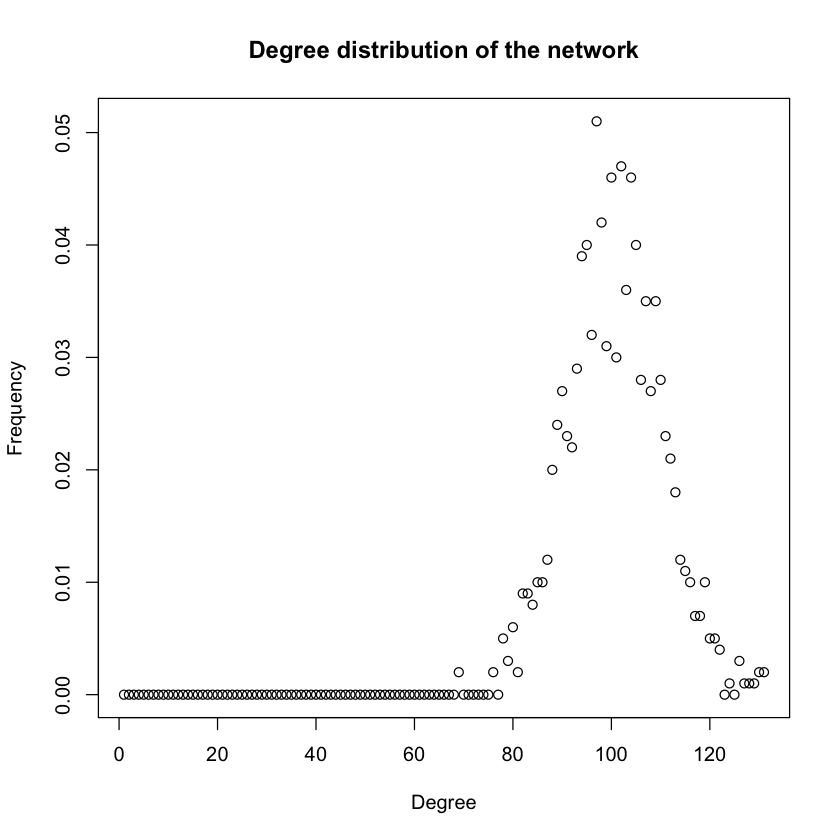

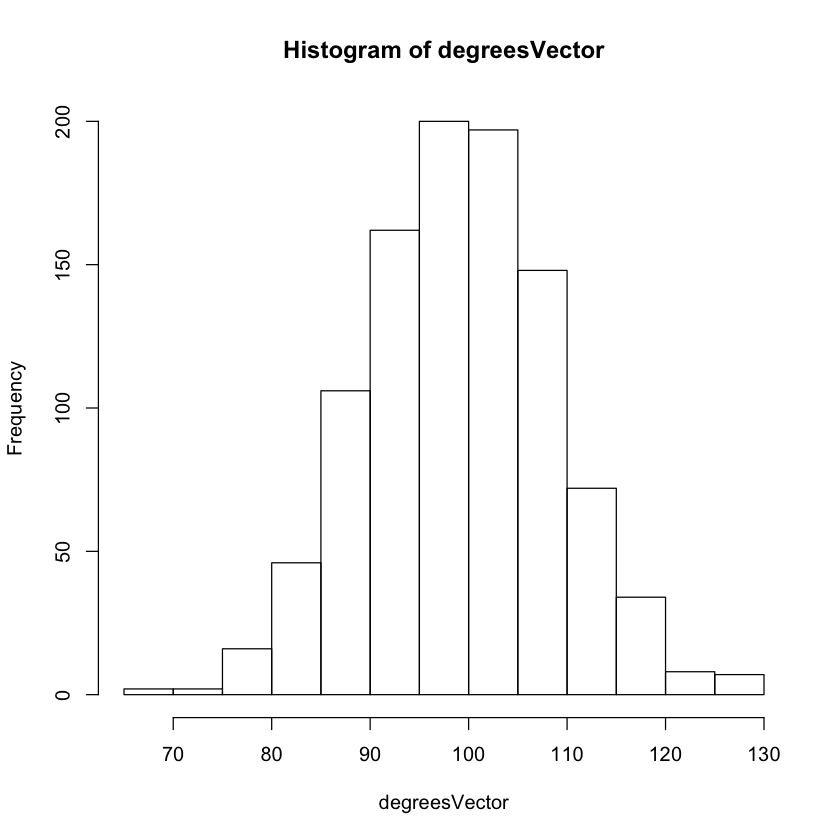

In [21]:
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
degreesVector <- degree(g)
hist(degreesVector)

## Operations on the graph
    1. Get subgraph
    2. Find GCC
    3. Find shortest path between nodes
    4. Find Communities

In [156]:
# http://igraph.org/r/doc/subgraph.html
g <- erdos.renyi.game(1000, p, directed=F)
sub_graph <-induced.subgraph(g,c(1:10))

In [169]:
V(g)[1:3]
E(g)[1:3]

+ 3/1000 vertices:
[1] 1 2 3

+ 3/50129 edges:
[1] 1--6 2--6 1--7

In [119]:
# Find GCC
g.components <- clusters(g)
print(g.components$csize)
# which is the largest component
ix <- which.max(g.components$csize)
# get the subgraph correspondent to just the giant component
g.giant <- induced.subgraph(g, which(g.components$membership == ix))

[1] 1000


In [155]:
##connected components in the graph
g <- erdos.renyi.game(100, 0.01, directed=F)
is.connected(g)
g.c<-clusters(g)

[1] FALSE

In [134]:
summary(g.c)

           Length Class  Mode   
membership 100    -none- numeric
csize       55    -none- numeric
no           1    -none- numeric

In [184]:
head(shortest.paths(g, mode = "all"),3)

0,2,2,2,2,1,1,2,2,2,⋯,2,2,2,1,2,2,1,2,2,2
2,0,2,2,2,1,2,2,2,2,⋯,2,2,2,2,2,2,2,2,2,2
2,2,0,2,2,2,2,2,2,2,⋯,2,2,2,2,2,2,2,1,2,2


In [190]:
shortest.paths(g, 1,6)

1


In [161]:
fg <- fastgreedy.community(g)
cmsize <- sizes(fg)
print(cmsize)

Community sizes
  1   2   3   4 
 10 161 413 416 


In [176]:
typeof(fg[1])

[1] "list"

In [170]:
which(fg$membership == 1)

[1]  33  99 657 703 771 900 931 932 934 936

## plot

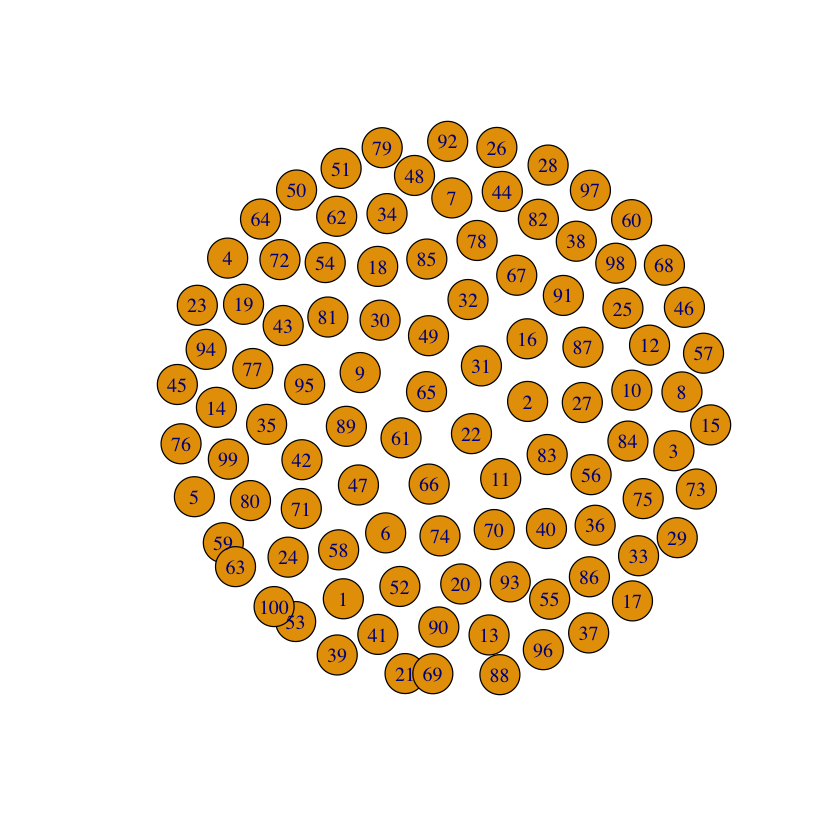

In [76]:
# with given layout
layout <-layout.fruchterman.reingold(g)
plot(g, layout=layout)

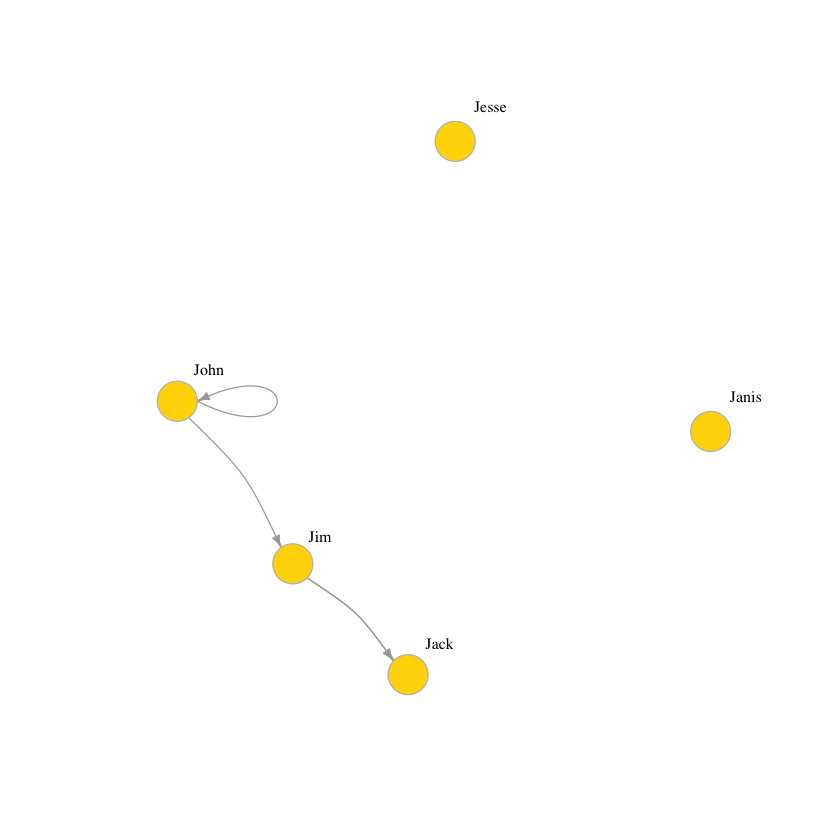

In [77]:
gJ <- graph( c("John", "Jim", "Jim", "Jack", "Jim", "Jack", "John", "John"), 

             isolates=c("Jesse", "Janis"))  

# In named graphs we can specify isolates by providing a list of their names.
plot(gJ, edge.arrow.size=.5, vertex.color="gold", vertex.size=15, 

     vertex.frame.color="gray", vertex.label.color="black", 

     vertex.label.cex=0.8, vertex.label.dist=1, edge.curved=0.2) 